In [4]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from IPython.display import display

In [5]:
#### Load in the data in csv

nhts_data = pd.read_csv('NHTS.csv')  # importing the national household travel survey
ngsim_data = pd.read_csv('NGSIM.csv')
# Perform the previously learned techniques to visualize the head, tail, columns, and print the data 

#print(nhts_data)
#nhts_data.columns

#print(ngsim_data)
#ngsim_data.columns

# Bar Chart

<Figure size 2000x2000 with 0 Axes>

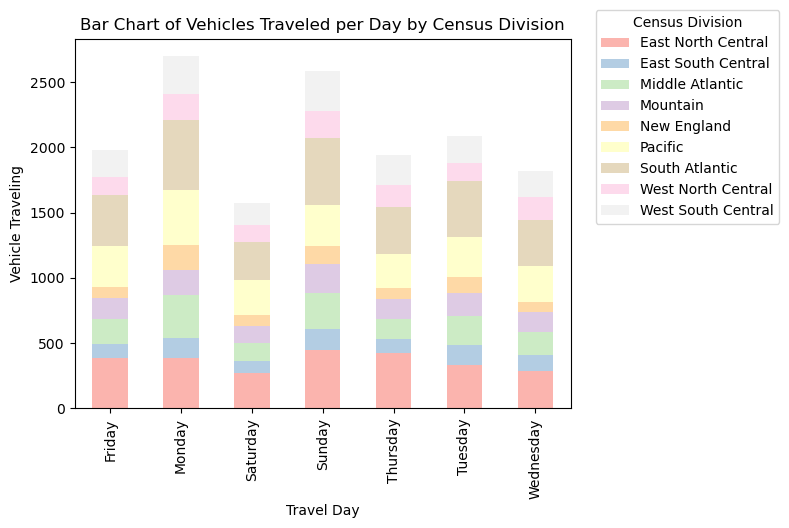

In [3]:
#bar chart for days most traveled day 

#import data as a subset for the graph to access
nhts_data = nhts_data.dropna(subset=['travel_day'])

#create the graph and upload data into the graph
plt.figure(figsize=(20,20))
data_grouped = nhts_data.groupby(['travel_day','census_division']).size().unstack(fill_value=0)
data_grouped.plot(kind='bar',stacked=True, color = sns.color_palette('Pastel1',len(data_grouped.columns)))

#customizing the graph axis labels, colors, title, and legend
plt.xlabel('Travel Day')
plt.ylabel('Vehicle Traveling')
plt.title('Stacked Bar Chart of Travel Day by Census Division')
plt.xticks(rotation=90)
plt.legend(loc=(1.05, 0.5),title='Census Division')
plt.title('Bar Chart of Vehicles Traveled per Day by Census Division')

#ordering days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nhts_data['travel_day'] = pd.Categorical(nhts_data['travel_day'], categories=day_order, ordered=True)
nhts_data = nhts_data.sort_values('travel_day')


plt.show()


# Histogram

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000'),
  Text(0, 8000.0, '8000')])

<Figure size 1200x600 with 0 Axes>

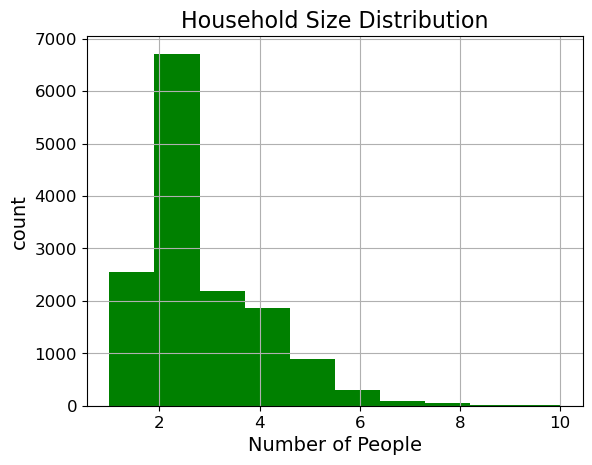

In [15]:
#Creates histogram
plt.figure(figsize=(12,6))
histogram = nhts_data.hist(column='household_size', color = ('green'))

#Labels axis and title 
plt.title('Household Size Distribution', fontsize=16)
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('count',fontsize=14)

#Sets fontsizes for ticks 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# BoxPlot of Household Income vs Vehicle Age

<Figure size 1200x600 with 0 Axes>

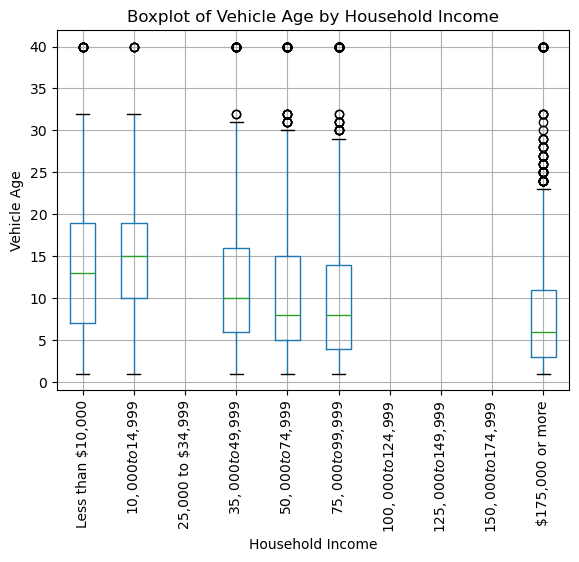

In [21]:
#This is a first try

#First, order the income from smallest to largest
income_order = ['Less than $10,000',
                '$10,000 to $14,999',
                '$25,000 to $34,999',
                '$35,000 to $49,999',
                '$50,000 to $74,999',
                '$75,000 to $99,999',
                '$100,000 to $124,999',
                '$125,000 to $149,999',
                '$150,000 to $174,999',
                '$175,000 or more']

#Convert the "household_income" column to an ordered categorical type
income_dtype = CategoricalDtype(categories = income_order, ordered = True)
nhts_data["household_income"] = nhts_data["household_income"].astype(income_dtype)

#Sort the DataFrame by income
nhts_data_sorted = nhts_data.sort_values(by="household_income")

#Boxplot of Household income
plt.figure(figsize = (12,6))
boxplot = nhts_data_sorted.boxplot(column = 'vehicle_age', by = 'household_income')
                                    
#Customization of BoxPlot
plt.xticks(rotation = 90)
plt.xlabel("Household Income")
plt.ylabel("Vehicle Age")
plt.title("Boxplot of Vehicle Age by Household Income")
plt.suptitle('')

#Show the Plot:
plt.show()

# Time Series Plot Comparing Follower and Leader Velocity 

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

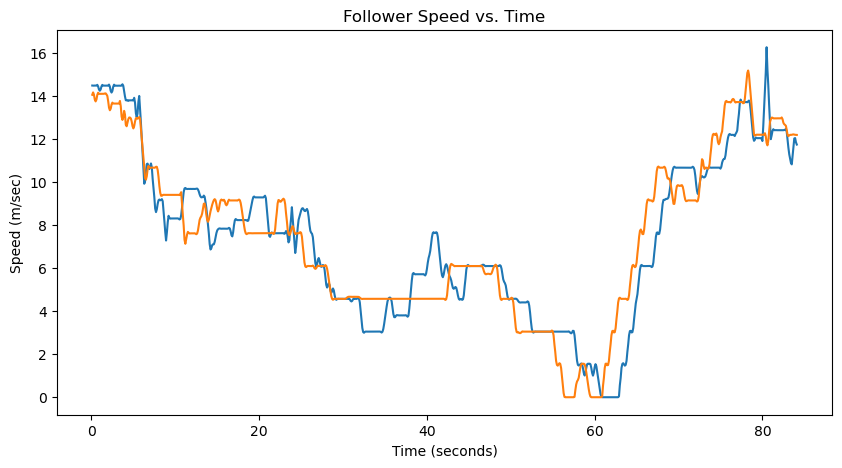

In [14]:
# select trajectory number
trajectory_number = 1 # vehicle pair x

# select the data based on the subset 
data_subset = ngsim_data[ngsim_data['trajectory_number'] == trajectory_number]

#Creates line plot
plt.figure(figsize=(10,5))
sns.lineplot(x = data_subset['Time'], y = data_subset['follower_speed(m/s)'])
sns.lineplot(x = data_subset['Time'], y = data_subset['leader_speed(m/s)'])

#Labels axis and title
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (m/sec)')
plt.title('Follower Speed vs. Time')

plt.show()

# Time Series Plot Showing Gap Distance Over Time

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


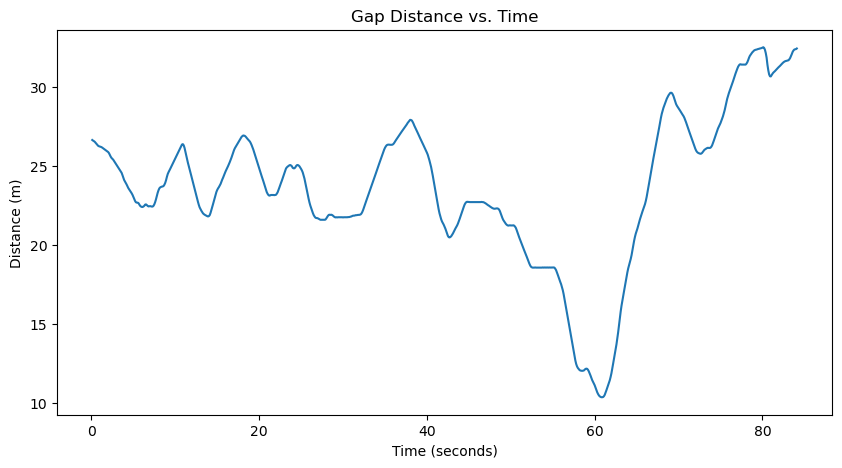

In [15]:
#Creates Lineplot
plt.figure(figsize=(10,5))
sns.lineplot(x = data_subset['Time'], y = data_subset['leader_position(m)'] - data_subset['follower_position(m)'])

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (m)')
plt.title('Gap Distance vs. Time')

plt.show()